# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key


# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Chosing IMPERIAL due to the exercise is in Fahrenheit
units = "imperial"

# Print the URL for the Open Weather API
url = "http://api.openweathermap.org/data/2.5/weather?"
query_url = f"{url}appid={weather_api_key}&units={units}&q="
query_url

'http://api.openweathermap.org/data/2.5/weather?appid=965010596c72e3ffae1f9da4fdaa87ed&units=imperial&q='

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

652

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Initial print as asked in the result.

print('''Beginning Data Retrieval     
-----------------------------''')

# Declare variables would be used in the loop.

record_num = 0                   # The result has the structure "Processing Record *1* of Set 1". Change each iteration.
record_set = 1                   # The result has the structure "Processing Record 1 of Set *1*". Change each set of 50.
city_result = []                 # Variabes would be concatenate in a list to make the Data Frame (lat/tem/hum/cloud/wind)  

# Loop for save the iteration of each response.
# Here is an example of how data looks in API: http://api.openweathermap.org/data/2.5/weather?appid=965010596c72e3ffae1f9da4fdaa87ed&units=imperial&q=ostrovnoy

for city in cities:
    city_url = query_url + city                   # Add to the URL the city save in cities, taken randomly for step before.
    weather_response = requests.get(city_url)    # Declare a JSON to read the API
    weather_json = weather_response.json()

    try:                         # Using try to jump error, in case the city do not contain the paramters.
        record_num += 1          # Each iteration would add a number. Ex. Record 1, 2 , 3,...
        latitude = weather_json["coord"]["lat"]        # It reads JSON and teakes the parameter "lat" which is inside the main "coord"
        longitude = weather_json["coord"]["lon"]
        max_temp = weather_json["main"]["temp_max"]
        humidity = weather_json["main"]["humidity"]
        cloudiness = weather_json["clouds"]["all"]
        wind_speed = weather_json["wind"]["speed"]
        country = weather_json["sys"]["country"]
        date = weather_json["dt"]
        
        # Use APPEND to concatenate all the info got it above
        city_result.append({"City":city, "Lat": latitude, "Lng" : longitude, "Max Temp": max_temp, 
                            "Humidity": humidity, "Cloudiness":  cloudiness, "Wind Speed": wind_speed, 
                            "Country": country, "Date": date})
        
        print(f"Processing Record {record_num} of Set {record_set} | {city}")
        
    except KeyError:                              # Use excecpt in case the coordinated do not find a city near.
        print("City not found.Skipping...")
        
    # Declare limits to jump to the next set of information. As example, maximum iteration is 50 by set.
    if record_num == 50:
        record_set += 1
        record_num = 0
        time.sleep(10)         # Giving time space between sets to avoid errors.
            
print('''-----------------------------
Data Retrieval Complete      
-----------------------------''')    

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ushuaia
Processing Record 2 of Set 1 | mafinga
Processing Record 3 of Set 1 | bluff
Processing Record 4 of Set 1 | porohy
Processing Record 5 of Set 1 | san cristobal
Processing Record 6 of Set 1 | herat
Processing Record 7 of Set 1 | atuona
Processing Record 8 of Set 1 | mataura
Processing Record 9 of Set 1 | ponta do sol
Processing Record 10 of Set 1 | madang
Processing Record 11 of Set 1 | qaanaaq
Processing Record 12 of Set 1 | tuktoyaktuk
Processing Record 13 of Set 1 | port lincoln
Processing Record 14 of Set 1 | santa cruz de tenerife
Processing Record 15 of Set 1 | zhaoyuan
Processing Record 16 of Set 1 | solnechnyy
Processing Record 17 of Set 1 | ahuimanu
Processing Record 18 of Set 1 | iqaluit
Processing Record 19 of Set 1 | pevek
Processing Record 20 of Set 1 | punta arenas
Processing Record 21 of Set 1 | hun
Processing Record 22 of Set 1 | rikitea
Processing Record 23 of Set 1 | sitka

Processing Record 6 of Set 5 | aklavik
City not found.Skipping...
Processing Record 8 of Set 5 | elban
Processing Record 9 of Set 5 | kaitangata
Processing Record 10 of Set 5 | derzhavinsk
Processing Record 11 of Set 5 | kodiak
Processing Record 12 of Set 5 | fortuna
Processing Record 13 of Set 5 | kungurtug
Processing Record 14 of Set 5 | bredasdorp
Processing Record 15 of Set 5 | codrington
Processing Record 16 of Set 5 | harper
Processing Record 17 of Set 5 | youghal
Processing Record 18 of Set 5 | yenagoa
Processing Record 19 of Set 5 | presidencia roque saenz pena
City not found.Skipping...
Processing Record 21 of Set 5 | dunedin
Processing Record 22 of Set 5 | muromtsevo
Processing Record 23 of Set 5 | antofagasta
Processing Record 24 of Set 5 | wanning
Processing Record 25 of Set 5 | uruzgan
Processing Record 26 of Set 5 | bereda
Processing Record 27 of Set 5 | ubinskoye
Processing Record 28 of Set 5 | kalmunai
Processing Record 29 of Set 5 | kukmor
Processing Record 30 of Set 5

Processing Record 11 of Set 9 | camacha
Processing Record 12 of Set 9 | smithers
City not found.Skipping...
City not found.Skipping...
Processing Record 15 of Set 9 | hanstholm
Processing Record 16 of Set 9 | bonavista
Processing Record 17 of Set 9 | trelew
Processing Record 18 of Set 9 | ambilobe
Processing Record 19 of Set 9 | kintampo
Processing Record 20 of Set 9 | kem
Processing Record 21 of Set 9 | rock sound
Processing Record 22 of Set 9 | san rafael del sur
Processing Record 23 of Set 9 | bereznik
Processing Record 24 of Set 9 | christchurch
Processing Record 25 of Set 9 | baragua
Processing Record 26 of Set 9 | turukhansk
Processing Record 27 of Set 9 | comodoro rivadavia
City not found.Skipping...
Processing Record 29 of Set 9 | high level
Processing Record 30 of Set 9 | saint-prosper
Processing Record 31 of Set 9 | ossora
Processing Record 32 of Set 9 | kanungu
Processing Record 33 of Set 9 | marsa matruh
Processing Record 34 of Set 9 | yarada
Processing Record 35 of Set 9 |

Processing Record 12 of Set 13 | bandundu
Processing Record 13 of Set 13 | hovd
Processing Record 14 of Set 13 | kaohsiung
City not found.Skipping...
Processing Record 16 of Set 13 | asmara
Processing Record 17 of Set 13 | biggar
City not found.Skipping...
Processing Record 19 of Set 13 | matara
Processing Record 20 of Set 13 | sept-iles
Processing Record 21 of Set 13 | exeter
Processing Record 22 of Set 13 | port macquarie
Processing Record 23 of Set 13 | zharkent
Processing Record 24 of Set 13 | sao joao da barra
Processing Record 25 of Set 13 | sioux lookout
Processing Record 26 of Set 13 | qaqortoq
City not found.Skipping...
Processing Record 28 of Set 13 | mehran
Processing Record 29 of Set 13 | asfi
Processing Record 30 of Set 13 | coari
Processing Record 31 of Set 13 | ewa beach
Processing Record 32 of Set 13 | kentau
Processing Record 33 of Set 13 | buchanan
Processing Record 34 of Set 13 | tiznit
Processing Record 35 of Set 13 | westport
Processing Record 36 of Set 13 | krasna

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# Create a Data Frame - in this case is not necessary to clean, in case use dropna()

weather_result = pd.DataFrame(city_result)
weather_result

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ushuaia,-54.8000,-68.3000,50.00,50,20,2.30,AR,1619313123
1,mafinga,-7.2500,35.0667,64.33,91,33,3.27,TZ,1619312954
2,bluff,-46.6000,168.3333,46.99,81,94,11.99,NZ,1619313187
3,porohy,48.6876,24.2632,35.96,86,100,4.72,UA,1619313187
4,san cristobal,7.7669,-72.2250,80.60,83,75,4.61,VE,1619313187
...,...,...,...,...,...,...,...,...,...
597,port-gentil,-0.7193,8.7815,78.76,85,99,11.32,GA,1619313465
598,hof,50.3167,11.9167,34.00,82,78,4.00,DE,1619313532
599,polignano a mare,40.9959,17.2159,50.00,70,0,12.62,IT,1619313533
600,chokurdakh,70.6333,147.9167,11.55,79,0,6.98,RU,1619313430


In [6]:
# Save dataframe in output_data file.

weather_result.to_csv("output_data/weather_city_data.csv", index=False, header=True)


In [7]:
# Use fucntion .describe to show the metrics for the Data Frame

weather_result.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000,6.020000e+02
mean,20.667345,19.025142,60.670831,69.112957,53.621262,7.860133,1.619313e+09
std,32.679101,88.135148,18.705555,22.186710,41.168532,5.397939,1.244462e+02
min,-54.800000,-175.200000,5.140000,6.000000,0.000000,0.270000,1.619312e+09
25%,-3.772175,-59.257225,44.600000,57.000000,5.000000,3.440000,1.619313e+09
50%,22.450900,19.584650,63.165000,74.000000,68.000000,6.910000,1.619313e+09
75%,48.678175,91.395900,77.362500,86.000000,98.000000,10.380000,1.619313e+09
max,78.218600,178.416700,91.560000,100.000000,100.000000,33.380000,1.619314e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [9]:
# Get the indices of cities that have humidity over 100%.
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

weather_result = weather_result[weather_result["Humidity"] <= 100]

weather_result


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ushuaia,-54.8000,-68.3000,50.00,50,20,2.30,AR,1619313123
1,mafinga,-7.2500,35.0667,64.33,91,33,3.27,TZ,1619312954
2,bluff,-46.6000,168.3333,46.99,81,94,11.99,NZ,1619313187
3,porohy,48.6876,24.2632,35.96,86,100,4.72,UA,1619313187
4,san cristobal,7.7669,-72.2250,80.60,83,75,4.61,VE,1619313187
...,...,...,...,...,...,...,...,...,...
597,port-gentil,-0.7193,8.7815,78.76,85,99,11.32,GA,1619313465
598,hof,50.3167,11.9167,34.00,82,78,4.00,DE,1619313532
599,polignano a mare,40.9959,17.2159,50.00,70,0,12.62,IT,1619313533
600,chokurdakh,70.6333,147.9167,11.55,79,0,6.98,RU,1619313430


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

FileNotFoundError: [Errno 2] No such file or directory: 'Figures/fig1.png'

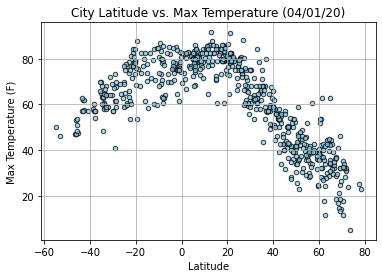

In [10]:
# Create a scatter plot (alpha = size / edgecolor = border / color = circle color) 
weather_result.plot.scatter(x="Lat", y="Max Temp", color="skyblue", alpha=0.75, edgecolors = "black")

# Additional Properties

plt.title("City Latitude vs. Max Temperature (04/01/20)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid (b=True,which="major",axis="both",linestyle="-")  
plt.savefig("Figures/fig1.png")
plt.show()


## Latitude vs. Humidity Plot

## Latitude vs. Cloudiness Plot

## Latitude vs. Wind Speed Plot

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression